In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.image as mpimg

## Three different Gaussian random variables, i.e., $X1$, $X2$ and $X3$ with $0$ mean and $1$ variance. 

In [16]:
M = 2000

mu = 0
sigma = 1

x1 = np.random.normal(mu,sigma,M)
x2 = np.random.normal(mu,sigma,M)
x3 = np.random.normal(mu,sigma,M)

X = np.transpose(np.reshape(np.array([x1,x2,x3]),[3,M]))
print(len(X[0]))

3


## <font color='red'>1. Compute the covariance matrix of  $X1$, $X2$ and $X3$. Covariance matrix (CV) $$CV = \begin{bmatrix} cov(X1,X1) & cov(X1,X2)& cov(X1,X3)\\cov(X2,X1) & cov(X2,X2)& cov(X2,X3)\\cov(X3,X1) & cov(X3,X2)& cov(X3,X3)\end{bmatrix}.$$ Here, $$cov(X,Y)=E[XY]-E[X]E[Y]$$</font> 


In [19]:
def column(matrix, i):
    return np.array([row[i] for row in matrix])

def covmat(data_mat):
    
    # n is number of random variables
    n = len(data_mat[0])
    
    CV = np.zeros([n,n])
    
    #individual means of all random variables
    for i in range(0,n):
        curr_vector = column(data_mat,i)
        temp = curr_vector*curr_vector
        CV[i][i] = np.mean(temp) - np.mean(curr_vector)*np.mean(curr_vector)
    
    #for two variables
    for i in range(0,n):
        for j in range(i+1,n):
            col1 = column(data_mat,i)
            col2 = column(data_mat,j)
            final = col1*col2
            CV[i][j] = np.mean(final) - np.mean(col1)*np.mean(col2)
            CV[j][i] = CV[i][j]
    
#     #variance of x1
#     #mean of x^2
#     x11 = x1*x1
#     val = np.mean(x11)
#     CV[0][0] = val-np.mean(x1)*np.mean(x1)
    
#     x22 = x2*x2
#     val = np.mean(x22)
#     CV[1][1] = val-np.mean(x2)*np.mean(x2)
    
#     x33 = x3*x3
#     val = np.mean(x33)
#     CV[2][2] = val-np.mean(x3)*np.mean(x3)
    
#     x12 = np.zeros_like(x1)
    
#     #co variance of x1 and x2
#     for i in range(0,M):
#         x12[i] = x1[i]*x2[i]
#     CV[0][1] = np.mean(x12)-np.mean(x1)*np.mean(x2)
#     CV[1][0] = CV[0][1]
    
#     x32 = np.zeros_like(x1)
#     for i in range(0,M):
#         x32[i] = x3[i]*x2[i]
#     CV[1][2] = np.mean(x32)-np.mean(x3)*np.mean(x2)
#     CV[2][1] = CV[1][2]
    
#     x13 = np.zeros_like(x1)
#     for i in range(0,M):
#         x13[i] = x1[i]*x3[i]
#     CV[0][2] = np.mean(x13)-np.mean(x1)*np.mean(x3)
#     CV[2][0] = CV[0][2]
        
    return CV

[[ 1.01633742 -0.04347989  0.00702793]
 [-0.04347989  0.99016369  0.01599443]
 [ 0.00702793  0.01599443  0.97730529]]


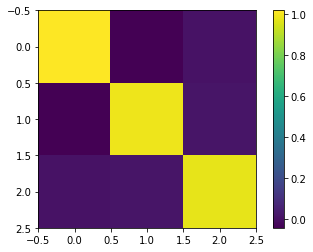

In [20]:
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>2. Generate three random variables as $X1$, $X2$ and $X1+X2$. Compute the covariance matrix</font> 

[[ 1.3191293  -0.02745674  1.29167255]
 [-0.02745674  1.31288213  1.28542538]
 [ 1.29167255  1.28542538  2.57709794]]


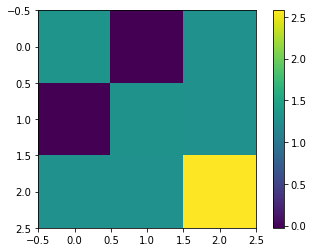

In [21]:
x1 = np.random.uniform(5,9,M)
x2 = np.random.uniform(15,19,M)
x3 = x1 + x2
X = np.transpose(np.reshape(np.array([x1,x2,x3]),[3,M]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>3. Generate covariance matrix of correlated data. Take face images as the data.</font> 

[[-16354.60012522 -14246.51604614 -14245.30647319 -14557.76122766
  -15987.5130235  -16533.85277879]
 [-14246.51604614 -12438.46267815 -12414.67478852 -12688.2016277
  -13937.5356198  -14412.66278925]
 [-14245.30647319 -12414.67478852 -12432.98480126 -12686.65473454
  -13933.34908939 -14409.73408491]
 [-14557.76122766 -12688.2016277  -12686.65473454 -12986.96458123
  -14241.61305505 -14728.08677508]
 [-15987.5130235  -13937.5356198  -13933.34908939 -14241.61305505
  -15669.1158713  -16174.92234759]
 [-16533.85277879 -14412.66278925 -14409.73408491 -14728.08677508
  -16174.92234759 -16748.9134148 ]]


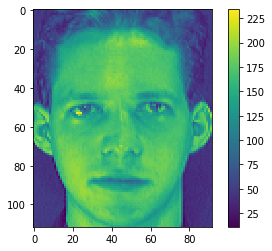

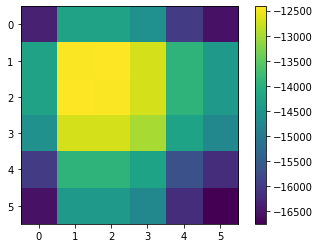

In [23]:
X1 = mpimg.imread('f1.pgm')
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X1 = X1.flatten()
X2 = mpimg.imread('f2.pgm').flatten()
X3 = mpimg.imread('f3.pgm').flatten()
X4 = mpimg.imread('f4.pgm').flatten()
X5 = mpimg.imread('f5.pgm').flatten()
X6 = mpimg.imread('f6.pgm').flatten()

X =  np.transpose(np.reshape(np.array([X1,X2,X3,X4,X5,X6]),[6,n*m]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>4. Show that data and noise are uncorrelated. Take Image files as your data and standard gaussian noise.</font> 

[[ 1.00000000e+00  6.86364063e-01  5.43393694e-01  5.76192802e-01
   3.72836320e-01  3.00766740e-01  3.29827832e-03]
 [ 6.86364063e-01  1.00000000e+00  4.36424961e-01  4.08870995e-01
   3.26988068e-01  1.18513726e-01  1.21338105e-03]
 [ 5.43393694e-01  4.36424961e-01  1.00000000e+00  5.98566612e-01
   4.73639113e-01  3.97086330e-01 -4.81854271e-03]
 [ 5.76192802e-01  4.08870995e-01  5.98566612e-01  1.00000000e+00
   5.21458256e-01  3.60153830e-01  9.55744088e-04]
 [ 3.72836320e-01  3.26988068e-01  4.73639113e-01  5.21458256e-01
   1.00000000e+00  2.89964477e-01 -9.78006971e-03]
 [ 3.00766740e-01  1.18513726e-01  3.97086330e-01  3.60153830e-01
   2.89964477e-01  1.00000000e+00  7.05098623e-03]
 [ 3.29827832e-03  1.21338105e-03 -4.81854271e-03  9.55744088e-04
  -9.78006971e-03  7.05098623e-03  1.02794112e+00]]


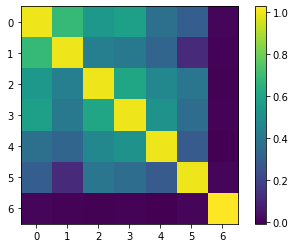

In [24]:
X1 = (X1-np.mean(X1))/np.std(X1) # FOR NORMALIZATION TO ZERO MEAN ONE VARIANCE
X2 = (X2-np.mean(X2))/np.std(X2)
X3 = (X3-np.mean(X3))/np.std(X3)
X4 = (X4-np.mean(X4))/np.std(X4)
X5 = (X5-np.mean(X5))/np.std(X5)
X6 = (X6-np.mean(X6))/np.std(X6)

XN = np.random.normal(0,1,n*m)
X =  np.transpose(np.reshape(np.array([X1,X2,X3,X4,X5,X6,XN]),[7,n*m]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## Consider $X1$,$X2$ and $X3$ uniform random variables

[[2.06917943 0.06614816 0.02317709]
 [0.06614816 2.05475902 0.00866315]
 [0.02317709 0.00866315 2.0578434 ]]


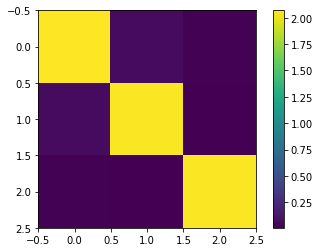

In [35]:
X1 = np.random.uniform(0,5,M)
X2 = np.random.uniform(0,5,M)
X3 = np.random.uniform(5,10,M)
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>5. Verify the properties of the covariance matrix.</font>

### <font color='red'> a) Symmetric,i.e.,$C_X = C_X^T.$ </font> 

In [38]:
tempCV = np.transpose(CV)
if (CV==tempCV).all():
    print("YES")
    print(CV)
else:
    print("NO")

YES
[[2.06917943 0.06614816 0.02317709]
 [0.06614816 2.05475902 0.00866315]
 [0.02317709 0.00866315 2.0578434 ]]


### <font color='red'> b) Its eigenvalues are greater than equal to zero</font>

In [40]:
from numpy import linalg as LA
print(LA.eig(CV))

(array([2.13540404, 1.9940675 , 2.05231031]), array([[ 0.72539885,  0.67903506, -0.11272932],
       [ 0.6257948 , -0.71879843, -0.30283607],
       [ 0.28666596, -0.14913151,  0.94635216]]))


### <font color='red'> c) It is positive semi-definite, i.e., for any real valued vector $a$,$$a^TC_Xa\geq0$$ </font>

In [41]:
a = np.random.rand(np.size(CV,0),1)
val = np.matmul(np.matmul(a.T,CV),a)
print(val)

[[3.53302134]]


## <font color='red'>6. Compute correlation coefficient matrix.</font>
Hint: you may require np.mean,np.prod,and np.std

$$\rho_{XY}=\frac{COV(X,Y)}{\sigma_X\sigma_Y}$$

In [42]:
def corr(data_mat):
    # n is number of random variables
    n = len(data_mat[0])
    
    CR = np.zeros([n,n])
    
    #individual means of all random variables
    for i in range(0,n):
        CR[i][i] = 1
        
    #for two variables
    for i in range(0,n):
        for j in range(i+1,n):
            col1 = column(data_mat,i)
            col2 = column(data_mat,j)
            final = col1*col2
            CR[i][j] = (np.mean(final) - np.mean(col1)*np.mean(col2))/(np.std(col1)*np.std(col2))
            CR[j][i] = CR[i][j]
    return CR

[[1.         0.03208029 0.01123191]
 [0.03208029 1.         0.00421298]
 [0.01123191 0.00421298 1.        ]]


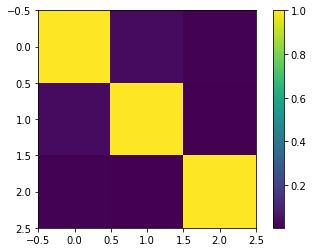

In [43]:
CR = corr(X)
print(CR)
fig=plt.figure()
plt.imshow(CR)
plt.colorbar()